# Library

## Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns
sns.set()

## Signal Processing

In [5]:
# !pip install wfdb
import wfdb
from wfdb import processing

In [6]:
from scipy.fftpack import fft #Fast Fourier Transform

In [7]:
# Peak Detection
# !pip install biosppy
from biosppy import storage
from biosppy.signals import ecg

In [8]:
# Filtering
# !pip install heartpy
import heartpy as hp

# Data Collection

## Partition

### Positive Dataset

In [9]:
def get_label(annotation):
    p = re.compile("([A-Za-z]+)")
    result = p.search(annotation)
    return result[1]

In [11]:
def get_record_start_partitions(record, physiobank_directory, minimum_duration, frequency_sampling, resampling = 0):
    start_sample = minimum_duration * 60 * frequency_sampling
    original_annotation = wfdb.rdann(record, 'atr', pn_dir=physiobank_directory, sampfrom=start_sample)
    original_signals, original_fields = wfdb.rdsamp(record, pn_dir=physiobank_directory, sampfrom=start_sample)
    
    if resampling != 0:
        start_sample = minimum_duration * 60 * resampling
        signals, annotation = processing.resample_multichan(original_signals, original_annotation, frequency_sampling, resampling)
    events = ['VT','VF','VFL']
    results = []
    
    for ann, sample in zip(annotation.aux_note, annotation.sample):
        if sample >= start_sample:
            label = get_label(ann)
            if label in events:
                print("{} | {}".format(sample, label))
        results.append(sample-start_sample) # n sample before events
    return results

In [12]:
# MIT-BIH Malignant Ventricular Ectopy Database
physiobank_directory = 'vfdb/'
records = ['418','419','420','421','422','423','424','425','426','427','428','429','430','602','605','607','609','610','611','612','614','615']

In [13]:
records_start_partitions = {}
total_partition = 0
for record in records:
    record_start_partitions = get_record_start_partitions(record, physiobank_directory, minimum_duration = 10, frequency_sampling = 250, resampling = 128)
    total_partition += len(record_start_partitions)
    print("Record {} -> {} partition".format(record, len(record_start_partitions)))
    records_start_partitions[record] = record_start_partitions
print("Total Partition: {}".format(total_partition))
display(records_start_partitions)

78365 | VFL
79330 | VFL
81634 | VFL
86626 | VFL
88603 | VFL
89491 | VFL
90244 | VFL
97320 | VFL
98205 | VFL
100163 | VFL
102508 | VFL
110995 | VFL
112620 | VFL
115381 | VFL
116332 | VFL
118430 | VFL
120063 | VFL
130165 | VFL
131081 | VFL
131711 | VFL
132893 | VFL
134527 | VFL
137885 | VFL
138918 | VFL
139293 | VFL
140120 | VFL
143142 | VFL
148164 | VFL
153845 | VFL
154380 | VFL
154741 | VFL
155069 | VFL
155464 | VFL
159458 | VFL
159793 | VFL
160678 | VFL
161020 | VFL
162425 | VFL
163165 | VFL
167669 | VFL
168634 | VFL
170918 | VFL
173961 | VFL
177476 | VFL
177870 | VFL
183108 | VFL
185708 | VFL
188287 | VFL
188714 | VFL
189518 | VFL
189937 | VFL
190484 | VFL
191014 | VFL
196657 | VFL
198094 | VFL
203178 | VFL
205193 | VFL
Record 418 -> 121 partition
117720 | VFL
176748 | VFL
217000 | VFL
249721 | VFL
252209 | VFL
Record 419 -> 69 partition
183059 | VT
204120 | VT
207182 | VT
Record 420 -> 9 partition
114451 | VT
116666 | VT
117414 | VT
117818 | VT
118212 | VT
118685 | VT
119020 | VT
11

{'418': [-76791,
  -25793,
  -24833,
  -8657,
  -8173,
  -7284,
  -6847,
  1565,
  2106,
  2530,
  3220,
  4834,
  5384,
  9826,
  10141,
  11803,
  12120,
  12691,
  13006,
  13444,
  14268,
  20520,
  21119,
  21405,
  21859,
  23363,
  23958,
  25708,
  25924,
  34195,
  35347,
  35820,
  37897,
  38581,
  38941,
  39532,
  40585,
  41630,
  42354,
  43263,
  43795,
  53365,
  53946,
  54281,
  54724,
  54911,
  55285,
  56093,
  57294,
  57727,
  58121,
  61085,
  61951,
  62118,
  62257,
  62493,
  62660,
  63320,
  64433,
  66342,
  67268,
  71364,
  72300,
  77045,
  77350,
  77580,
  77676,
  77941,
  78099,
  78269,
  78513,
  78664,
  79172,
  82658,
  82845,
  82993,
  83701,
  83878,
  84056,
  84220,
  85405,
  85625,
  85749,
  86365,
  86921,
  90869,
  91667,
  91834,
  92031,
  94118,
  94316,
  97161,
  97289,
  100676,
  100883,
  101070,
  101237,
  106308,
  106702,
  108908,
  109114,
  111487,
  111684,
  111914,
  112236,
  112718,
  112925,
  113137,
  113486,


In [14]:
partition_dictionary = {"418":[3057,4942,9442,19192,23054,24788,26259,40080,41807,45631,50211,66788,69961,75355,77211,81310,84499,104230,106019,107249,109557,112749,119307,121326,122057,123673,129576,139384,150480,151525,152230,152871,153641,161442,162096,163826,164493,167237,168682,177480,179365,183826,189769,196634,197403,207634,212711,217749,218583,220153,220971,222041,223076,234096,236903,246833,250769],"419":[79923,195211,273830,337737,342596],"420":[207538,248673,254653],"421":[73538,77865,79326,80115,80884,81807,82461,83115,84365,85615,86653,87403,88134,88884,89615,90326,91038,91769,131499,135673,137019,137961,139269,140461,141596,142980,144211,145192,146288,147346,148384,149442,150461,151519,152538,153634,155153,156134,157230,158442,159807,162711,168153,170826,172673,174519,176326,178615,180865,183961],"422":[183211,183942],"423":[74615],"424":[218961],"425":[82403],"426":[11432,193980,266961,285211,294269,308522,318003],"427":[12124],"428":[271865,280711,330826],"429":[313807,336105,336894,348778],"430":[6576,13192,22275,25429,46217,124391,169871,265025,343794],"602":[136814,139352,161833],"605":[261942],"607":[245461,312134,321519],"609":[105275,141506],"610":[309865],"611":[149057],"612":[276846],"614":[205942],"615":[1346,128538,353384]}
new_partition_dictionary = {}
for record, start_partitions in partition_dictionary.items():
    new_start = []
    for start_partition in start_partitions:
        new_start.append(int(round(start_partition * 128 / 250 , 0)))
    print(record)
    print(new_start)
    new_partition_dictionary[record] = new_start
new_partition_dictionary

418
[1565, 2530, 4834, 9826, 11804, 12691, 13445, 20521, 21405, 23363, 25708, 34195, 35820, 38582, 39532, 41631, 43263, 53366, 54282, 54911, 56093, 57727, 61085, 62119, 62493, 63321, 66343, 71365, 77046, 77581, 77942, 78270, 78664, 82658, 82993, 83879, 84220, 85625, 86365, 90870, 91835, 94119, 97162, 100677, 101070, 106309, 108908, 111487, 111914, 112718, 113137, 113685, 114215, 119857, 121294, 126378, 128394]
419
[40921, 99948, 140201, 172921, 175409]
420
[106259, 127321, 130382]
421
[37651, 39867, 40615, 41019, 41413, 41885, 42220, 42555, 43195, 43835, 44366, 44750, 45125, 45509, 45883, 46247, 46611, 46986, 67327, 69465, 70154, 70636, 71306, 71916, 72497, 73206, 73836, 74338, 74899, 75441, 75973, 76514, 77036, 77578, 78099, 78661, 79438, 79941, 80502, 81122, 81821, 83308, 86094, 87463, 88409, 89354, 90279, 91451, 92603, 94188]
422
[93804, 94178]
423
[38203]
424
[112108]
425
[42190]
426
[5853, 99318, 136684, 146028, 150666, 157963, 162818]
427
[6207]
428
[139195, 143724, 169383]
429
[

{'418': [1565,
  2530,
  4834,
  9826,
  11804,
  12691,
  13445,
  20521,
  21405,
  23363,
  25708,
  34195,
  35820,
  38582,
  39532,
  41631,
  43263,
  53366,
  54282,
  54911,
  56093,
  57727,
  61085,
  62119,
  62493,
  63321,
  66343,
  71365,
  77046,
  77581,
  77942,
  78270,
  78664,
  82658,
  82993,
  83879,
  84220,
  85625,
  86365,
  90870,
  91835,
  94119,
  97162,
  100677,
  101070,
  106309,
  108908,
  111487,
  111914,
  112718,
  113137,
  113685,
  114215,
  119857,
  121294,
  126378,
  128394],
 '419': [40921, 99948, 140201, 172921, 175409],
 '420': [106259, 127321, 130382],
 '421': [37651,
  39867,
  40615,
  41019,
  41413,
  41885,
  42220,
  42555,
  43195,
  43835,
  44366,
  44750,
  45125,
  45509,
  45883,
  46247,
  46611,
  46986,
  67327,
  69465,
  70154,
  70636,
  71306,
  71916,
  72497,
  73206,
  73836,
  74338,
  74899,
  75441,
  75973,
  76514,
  77036,
  77578,
  78099,
  78661,
  79438,
  79941,
  80502,
  81122,
  81821,
  83308,
  

### Negative Dataset

In [15]:
def get_negative_record_start_partitions(record, physiobank_directory, partition_per_record, duration):
    signals, fields = wfdb.rdsamp(record, pn_dir=physiobank_directory, sampto=1)
    frequency_sampling = fields['fs']
    sample_duration = duration * 60 * frequency_sampling # minutes * 60 * sample per second
    results = []
    start_partition = 0
    
    for i in range(partition_per_record):
        results.append(start_partition)
        start_partition += sample_duration
    return results

In [16]:
# MIT-BIH Normal Sinus Rhythm Database
physiobank_directory = 'nsrdb/'
records = ['16265','16272','16273','16420','16483','16539','16773','16786','16795','17052','17453','18177','18184','19088','19090','19093','19140','19830']

In [17]:
records_start_partitions = {}
total_partition = 0
for record in records:
    record_start_partitions = get_negative_record_start_partitions(record, physiobank_directory, partition_per_record = 9, duration = 5)
    total_partition += len(record_start_partitions)
    # print("Record {} -> {} partition".format(record, len(record_start_partitions)))
    records_start_partitions[record] = record_start_partitions
# print("Total Partition: {}".format(total_partition))
# display(records_start_partitions)

In [18]:
records_start_partitions

{'16265': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16272': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16273': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16420': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16483': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16539': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16773': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16786': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '16795': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '17052': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '17453': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '18177': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],
 '18184': [0, 38400, 76800, 115200, 153600, 192000, 230400, 268800, 307200],

# Preprocessing

## Filter

In [19]:
def frequency_analysis(signal, frequency_sampling):
    N = signal.shape[0]
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0/frequency_sampling), num=N//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.show()

In [20]:
def filter_signal(signal, frequency_sampling, low_freq, high_freq):
    # Filtering using Bandpass
    filtered = hp.filter_signal(signal, filtertype='bandpass', cutoff = [low_freq, high_freq], sample_rate = frequency_sampling)
    return filtered

## Peak Detection

In [21]:
def get_peaklist_v0(signal, frequency_sampling):
  # Detecting R peak
  # working_data, measures = hp.process(signal, frequency_sampling)
  # return working_data['peaklist']
    output = ecg.ecg(signal=signal, sampling_rate=frequency_sampling, show=False)
    return output['rpeaks']

In [22]:
def get_peaklist_v1(signal, frequency_sampling, method):
    if method == 'christov': # 2004
        rpeaks, = ecg.christov_segmenter(signal=signal, sampling_rate=frequency_sampling)
    elif method == 'engzee': # 1979 - 2012
        rpeaks, = ecg.engzee_segmenter(signal=signal, sampling_rate=frequency_sampling)
    elif method == 'gamboa': # nd
        rpeaks, = ecg.gamboa_segmenter(signal=signal, sampling_rate=frequency_sampling)
    elif method == 'hamilton': # 2002
        rpeaks, = ecg.hamilton_segmenter(signal=signal, sampling_rate=frequency_sampling)
    elif method == 'ssf': # nd
        rpeaks, = ecg.ssf_segmenter(signal=signal, sampling_rate=frequency_sampling)

    # Segment
    # Correct R-peak locations
    rpeaks, = ecg.correct_rpeaks(signal=signal,
                             rpeaks=rpeaks,
                             sampling_rate=frequency_sampling,
                             tol=0.05)
    # Extract templates
    templates, rpeaks = ecg.extract_heartbeats(signal=signal,
                                           rpeaks=rpeaks,
                                           sampling_rate=frequency_sampling,
                                           before=0.2,
                                           after=0.4)
    return rpeaks

In [23]:
def get_peaklist(signal, frequency_sampling):
    # Segment
    rpeaks, = ecg.engzee_segmenter(signal=signal, sampling_rate=frequency_sampling)
    # Correct R-peak locations
    rpeaks, = ecg.correct_rpeaks(signal=signal,
                             rpeaks=rpeaks,
                             sampling_rate=frequency_sampling,
                             tol=0.05)
    # Extract templates
    templates, rpeaks = ecg.extract_heartbeats(signal=signal,
                                           rpeaks=rpeaks,
                                           sampling_rate=frequency_sampling,
                                           before=0.2,
                                           after=0.4)
    return rpeaks

In [24]:
def save_peaklist(peaklist, folder, filename):
    peaklist_df = pd.DataFrame(peaklist, columns = ['peaklist'])
    path = "/content/drive/My Drive/Signal/" + folder + "/" + filename
    peaklist_df.to_csv(path, index=False)
    print("{} saved!".format(filename))

## Show Peak

In [25]:
def show_peak(signal, qrs_inds, start = 0):
    if start == 0:
        new_inds = qrs_inds
    else:
        new_inds = qrs_inds + start
        
    # peaks = signal.to_numpy()[qrs_inds]
    inds = [x for x in range(1,len(signal)+1,1)]
    peaks = signal[qrs_inds]
    fig, ax_left = plt.subplots(figsize=(14,4))
    ax_left.plot(inds, signal, color='#3979f0', label='Signal')
    ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
    plt.show()

In [26]:
# Get Dataset
def get_peaklist_from_drive(folder, record, partition, channel):
    folder = '/content/drive/My Drive/Signal/' + folder + '/'
    filename = 'peaklist_{}_partition_{}_channel_{}.csv'.format(record, partition, channel)
    dataset = []
    with open(folder+filename) as file:
        next(file)
        for i, line in enumerate(file.readlines()):
            data = line.split('\n')
            dataset.append(int(data[0]))
    
    return dataset

## Execution

In [32]:
def get_all_peaklist(physiobank_directory, partition_dictionary, folder, duration, resampling=0):
    for record, start_partitions in partition_dictionary.items():
        original_signals, original_fields = wfdb.rdsamp(record, pn_dir=physiobank_directory)
        channels = len(original_fields['sig_name'])
        frequency_sampling = original_fields['fs']

        if resampling != 0: # Resampling Signal
            original_annotation = wfdb.rdann(record, 'atr', pn_dir=physiobank_directory)
            resampled_signals, resampled_annotation = processing.resample_multichan(original_signals, original_annotation, frequency_sampling, resampling)
            frequency_sampling = resampling # Now Frequency Sampling equal to Resampling

        for partition, start_partition in enumerate(start_partitions):
            end_partition = start_partition + (duration * 60 * frequency_sampling)
            if resampling == 0:
                signals = original_signals[start_partition:end_partition, :]
            else:
                signals = resampled_signals[start_partition:end_partition, :]

            # # Frequency Analysis
            # print("Frequency Analysis")
            # frequency_analysis(signals[:,0], frequency_sampling)

            # Accessing Both Channel
            for channel in range(channels):
                signal = signals[:,channel]
                filtered_signal = filter_signal(signal, frequency_sampling, 7, 30) # Filter
                try:
                    peaklist = get_peaklist(filtered_signal, frequency_sampling) # Get Peaklist
                    save_peaklist(peaklist, folder, filename = "peaklist_{}_partition_{}_channel_{}.csv".format(record, partition+1, channel+1)) # Save Peaklist

                    # # Show Peak
                    # print("Partition {} - Channel {}".format(partition+1, channel+1))
                    # print(len(peaklist))
                    # show_peak(signal, peaklist)
                    # show_peak(filtered_signal, peaklist)
                except Exception as e:
                    print(e)
                    errors.append("{}_{}_{}.csv".format(record, partition+1, channel+1))
    
    print("Error: {}".format(len(errors)))
    for error in errors:
        print(error)

### Positive Dataset

In [33]:
errors = []
physiobank_directory = 'vfdb/'
# partition_dictionary = {"418":[3057,4942,9442,19192,23054,24788,26259,40080,41807,45631,50211,66788,69961,75355,77211,81310,84499,104230,106019,107249,109557,112749,119307,121326,122057,123673,129576,139384,150480,151525,152230,152871,153641,161442,162096,163826,164493,167237,168682,177480,179365,183826,189769,196634,197403,207634,212711,217749,218583,220153,220971,222041,223076,234096,236903,246833,250769],"419":[79923,195211,273830,337737,342596],"420":[207538,248673,254653],"421":[73538,77865,79326,80115,80884,81807,82461,83115,84365,85615,86653,87403,88134,88884,89615,90326,91038,91769,131499,135673,137019,137961,139269,140461,141596,142980,144211,145192,146288,147346,148384,149442,150461,151519,152538,153634,155153,156134,157230,158442,159807,162711,168153,170826,172673,174519,176326,178615,180865,183961],"422":[183211,183942],"423":[74615],"424":[218961],"425":[82403],"426":[11432,193980,266961,285211,294269,308522,318003],"427":[12124],"428":[271865,280711,330826],"429":[313807,336105,336894,348778],"430":[6576,13192,22275,25429,46217,124391,169871,265025,343794],"602":[136814,139352,161833],"605":[261942],"607":[245461,312134,321519],"609":[105275,141506],"610":[309865],"611":[149057],"612":[276846],"614":[205942],"615":[1346,128538,353384]}
# partition_dictionary = {"423":[74615]}
# partition_dictionary = {'418':[1565,2530,4834,9826,11804,12691,13445,20521,21405,23363,25708,34195,35820,38582,39532,41631,43263,53366,54282,54911,56093,57727,61085,62119,62493,63321,66343,71365,77046,77581,77942,78270,78664,82658,82993,83879,84220,85625,86365,90870,91835,94119,97162,100677,101070,106309,108908,111487,111914,112718,113137,113685,114215,115199,115199,115199,115199],'419':[40921,99948,115199,115199,115199],'420':[106259,115199,115199],'421':[37651,39867,40615,41019,41413,41885,42220,42555,43195,43835,44366,44750,45125,45509,45883,46247,46611,46986,67327,69465,70154,70636,71306,71916,72497,73206,73836,74338,74899,75441,75973,76514,77036,77578,78099,78661,79438,79941,80502,81122,81821,83308,86094,87463,88409,89354,90279,91451,92603,94188],'422':[93804,94178],'423':[38203],'424':[112108],'425':[42190],'426':[5853,99318,115199,115199,115199,115199,115199],'427':[6207],'428':[115199,115199,115199],'429':[115199,115199,115199,115199],'430':[3367,6754,11405,13020,23663,63688,86974,115199,115199],'602':[70049,71348,82858],'605':[115199],'607':[115199,115199,115199],'609':[53901,72451],'610':[115199],'611':[76317],'612':[115199],'614':[105442],'615':[689,65811,115199]}
partition_dictionary = {'418':[1565,2530,4834,9826,11804,12691,13445,20521,21405,23363,25708,34195,35820,38582,39532,41631,43263,53366,54282,54911,56093,57727,61085,62119,62493,63321,66343,71365,77046,77581,77942,78270,78664,82658,82993,83879,84220,85625,86365,90870,91835,94119,97162,100677,101070,106309,108908,111487,111914,112718,113137,113685,114215,119857,121294,126378,128394],'419':[40921,99948,140201,172921,175409],'420':[106259,127321,130382],'421':[37651,39867,40615,41019,41413,41885,42220,42555,43195,43835,44366,44750,45125,45509,45883,46247,46611,46986,67327,69465,70154,70636,71306,71916,72497,73206,73836,74338,74899,75441,75973,76514,77036,77578,78099,78661,79438,79941,80502,81122,81821,83308,86094,87463,88409,89354,90279,91451,92603,94188],'422':[93804,94178],'423':[38203],'424':[112108],'425':[42190],'426':[5853,99318,136684,146028,150666,157963,162818],'427':[6207],'428':[139195,143724,169383],'429':[160669,172086,172490,178574],'430':[3367,6754,11405,13020,23663,63688,86974,135693,176023],'602':[70049,71348,82858],'605':[134114],'607':[125676,159813,164618],'609':[53901,72451],'610':[158651],'611':[76317],'612':[141745],'614':[105442],'615':[689,65811,180933]}
# partition_dictionary = {'423':[38203]}
folder = "Positive-Peaklist"
duration = 5
frequency_sampling = 250
resampling = 128
get_all_peaklist(physiobank_directory, partition_dictionary, folder, duration, resampling)

Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Positive-Peaklist'
Cannot sav

### Negative Dataset

In [34]:
errors = []
physiobank_directory = 'nsrdb/'
partition_dictionary = {'16265':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16272':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16273':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16420':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16483':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16539':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16773':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16786':[0,38400,76800,115200,153600,192000,230400,268800,307200],'16795':[0,38400,76800,115200,153600,192000,230400,268800,307200],'17052':[0,38400,76800,115200,153600,192000,230400,268800,307200],'17453':[0,38400,76800,115200,153600,192000,230400,268800,307200],'18177':[0,38400,76800,115200,153600,192000,230400,268800,307200],'18184':[0,38400,76800,115200,153600,192000,230400,268800,307200],'19088':[0,38400,76800,115200,153600,192000,230400,268800,307200],'19090':[0,38400,76800,115200,153600,192000,230400,268800,307200],'19093':[0,38400,76800,115200,153600,192000,230400,268800,307200],'19140':[0,38400,76800,115200,153600,192000,230400,268800,307200],'19830':[0,38400,76800,115200,153600,192000,230400,268800,307200]}
# partition_dictionary = {'16265':[0]}
folder = "Negative-Peaklist"
duration = 5
frequency_sampling = 128
get_all_peaklist(physiobank_directory, partition_dictionary, folder, duration)

Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot save file into a non-existent directory: '\content\drive\My Drive\Signal\Negative-Peaklist'
Cannot sav

# Result

## Negative Dataset

C:\Users\Nicholas Dominic\AppData\Local\Temp\ipykernel_2196\1856319410.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
C:\Users\Nicholas Dominic\AppData\Local\Temp\ipykernel_2196\1856319410.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)


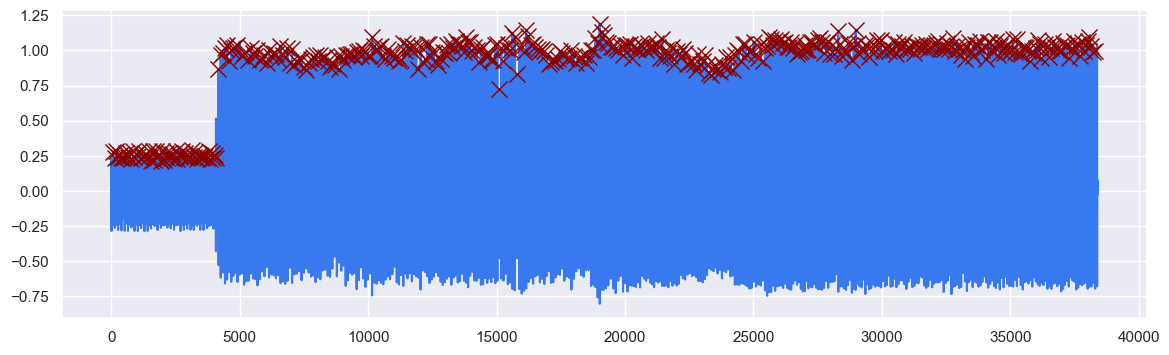

In [35]:
physiobank_directory = 'nsrdb/'
record = '19090'
partition = 1
channel = 1
start = 0
end = 38400
frequency_sampling = 128

signals, fields = wfdb.rdsamp(record, pn_dir=physiobank_directory, sampfrom=start, sampto=end)
filtered_signal = filter_signal(signals[:,channel-1], frequency_sampling, 7, 30)
qrs_inds = get_peaklist_v1(filtered_signal, frequency_sampling, 'engzee')
# qrs_inds = get_peaklist_from_drive(folder='Negative-Peaklist', record=record, partition=partition, channel=channel)
show_peak(signal=filtered_signal, qrs_inds=qrs_inds)

## Positive Dataset

In [36]:
physiobank_directory = 'vfdb/'

partition_dictionary = {'418':[1565,2530,4834,9826,11804,12691,13445,20521,21405,23363,25708,34195,35820,38582,39532,41631,43263,53366,54282,54911,56093,57727,61085,62119,62493,63321,66343,71365,77046,77581,77942,78270,78664,82658,82993,83879,84220,85625,86365,90870,91835,94119,97162,100677,101070,106309,108908,111487,111914,112718,113137,113685,114215,119857,121294,126378,128394],'419':[40921,99948,140201,172921,175409],'420':[106259,127321,130382],'421':[37651,39867,40615,41019,41413,41885,42220,42555,43195,43835,44366,44750,45125,45509,45883,46247,46611,46986,67327,69465,70154,70636,71306,71916,72497,73206,73836,74338,74899,75441,75973,76514,77036,77578,78099,78661,79438,79941,80502,81122,81821,83308,86094,87463,88409,89354,90279,91451,92603,94188],'422':[93804,94178],'423':[38203],'424':[112108],'425':[42190],'426':[5853,99318,136684,146028,150666,157963,162818],'427':[6207],'428':[139195,143724,169383],'429':[160669,172086,172490,178574],'430':[3367,6754,11405,13020,23663,63688,86974,135693,176023],'602':[70049,71348,82858],'605':[134114],'607':[125676,159813,164618],'609':[53901,72451],'610':[158651],'611':[76317],'612':[141745],'614':[105442],'615':[689,65811,180933]}
record = '418'
starts = partition_dictionary[record]
# partition = 7

channel = 1
# start = starts[partition-1]
for partition, start in enumerate(starts):
    if partition > 49:
        print("Partition {}".format(partition+1))
        end = start + 38400
        frequency_sampling = 250
        resampling = 128

        original_signals, original_fields = wfdb.rdsamp(record, pn_dir=physiobank_directory)
        original_annotation = wfdb.rdann(record, 'atr', pn_dir=physiobank_directory)
        resampled_signals, resampled_annotation = processing.resample_multichan(original_signals, original_annotation, frequency_sampling, resampling)
        frequency_sampling = resampling # Now Frequency Sampling equal to Resampling

        signals = resampled_signals[start:end, :]
        # frequency_analysis(signals[:,channel-1], frequency_sampling)
        filtered_signal = filter_signal(signals[:,channel-1], frequency_sampling, 7, 30)
        qrs_inds = get_peaklist_from_drive(folder='Positive-Peaklist', record=record, partition=partition+1, channel=channel)
        show_peak(signal=filtered_signal, qrs_inds=qrs_inds)

Partition 51


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Signal/Positive-Peaklist/peaklist_418_partition_51_channel_1.csv'

Partition 1


C:\Users\Nicholas Dominic\AppData\Local\Temp\ipykernel_2196\1856319410.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
C:\Users\Nicholas Dominic\AppData\Local\Temp\ipykernel_2196\1856319410.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)


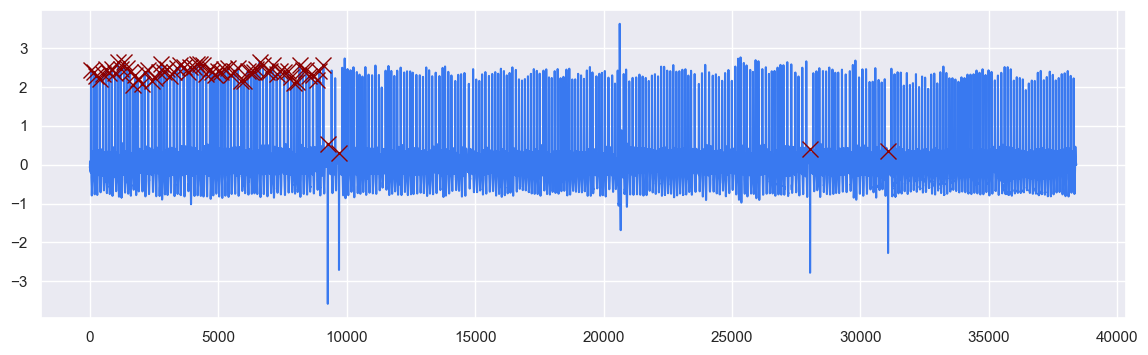

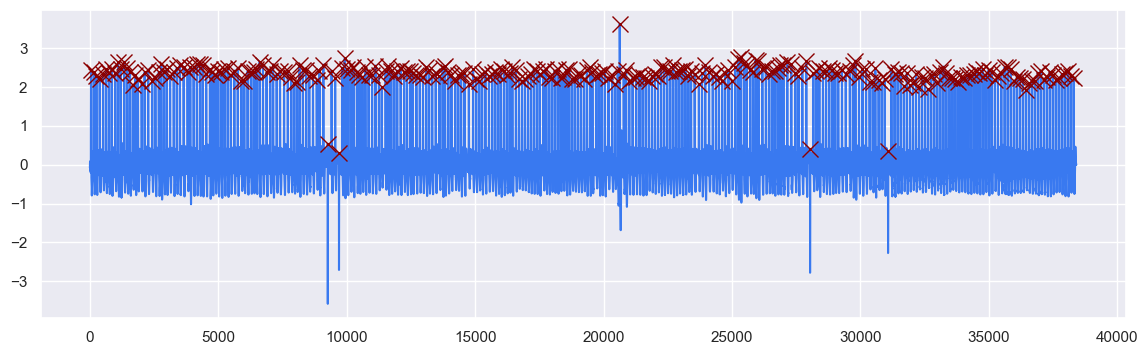

Partition 2


C:\Users\Nicholas Dominic\AppData\Local\Temp\ipykernel_2196\1856319410.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
C:\Users\Nicholas Dominic\AppData\Local\Temp\ipykernel_2196\1856319410.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(new_inds, peaks, 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)


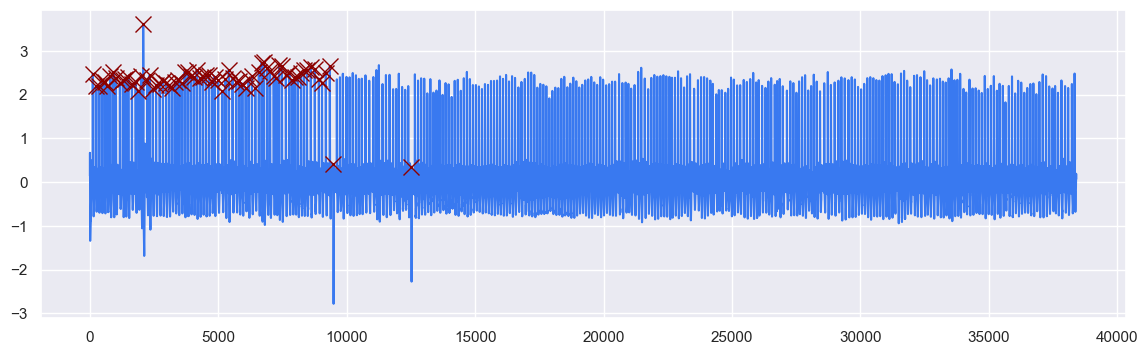

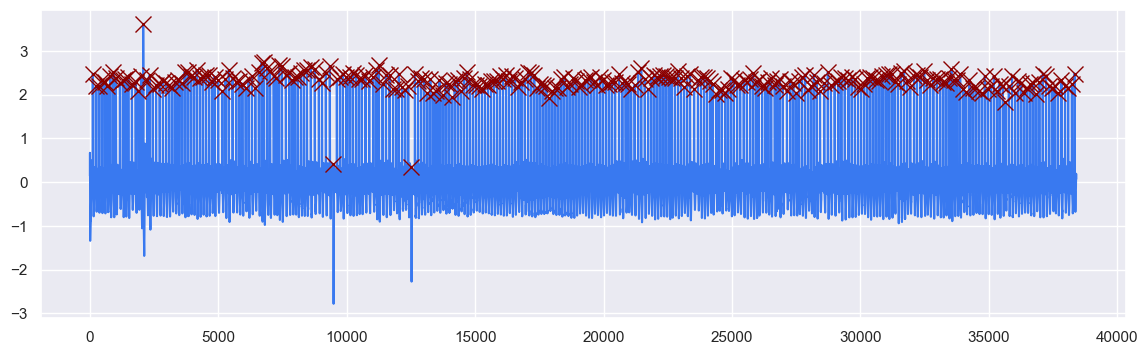

In [37]:
physiobank_directory = 'vfdb/'

partition_dictionary = {'418':[1565,2530,4834,9826,11804,12691,13445,20521,21405,23363,25708,34195,35820,38582,39532,41631,43263,53366,54282,54911,56093,57727,61085,62119,62493,63321,66343,71365,77046,77581,77942,78270,78664,82658,82993,83879,84220,85625,86365,90870,91835,94119,97162,100677,101070,106309,108908,111487,111914,112718,113137,113685,114215,119857,121294,126378,128394],'419':[40921,99948,140201,172921,175409],'420':[106259,127321,130382],'421':[37651,39867,40615,41019,41413,41885,42220,42555,43195,43835,44366,44750,45125,45509,45883,46247,46611,46986,67327,69465,70154,70636,71306,71916,72497,73206,73836,74338,74899,75441,75973,76514,77036,77578,78099,78661,79438,79941,80502,81122,81821,83308,86094,87463,88409,89354,90279,91451,92603,94188],'422':[93804,94178],'423':[38203],'424':[112108],'425':[42190],'426':[5853,99318,136684,146028,150666,157963,162818],'427':[6207],'428':[139195,143724,169383],'429':[160669,172086,172490,178574],'430':[3367,6754,11405,13020,23663,63688,86974,135693,176023],'602':[70049,71348,82858],'605':[134114],'607':[125676,159813,164618],'609':[53901,72451],'610':[158651],'611':[76317],'612':[141745],'614':[105442],'615':[689,65811,180933]}
record = '609'
starts = partition_dictionary[record]
# partition = 7

channel = 1
# start = starts[partition-1]
for partition, start in enumerate(starts):
    if partition > -1:
        print("Partition {}".format(partition+1))
        end = start + 38400
        frequency_sampling = 250
        resampling = 128

        original_signals, original_fields = wfdb.rdsamp(record, pn_dir=physiobank_directory)
        original_annotation = wfdb.rdann(record, 'atr', pn_dir=physiobank_directory)
        resampled_signals, resampled_annotation = processing.resample_multichan(original_signals, original_annotation, frequency_sampling, resampling)
        frequency_sampling = resampling # Now Frequency Sampling equal to Resampling

        signals = resampled_signals[start:end, :]
        # frequency_analysis(signals[:,channel-1], frequency_sampling)
        filtered_signal = filter_signal(signals[:,channel-1], frequency_sampling, 1, 30)
        # filtered_signal = signals[:,channel-1]
        # qrs_inds = get_peaklist_v0(filtered_signal, frequency_sampling)
        qrs_inds = get_peaklist_v1(filtered_signal, frequency_sampling, 'christov')
        show_peak(signal=filtered_signal, qrs_inds=qrs_inds)
        qrs_inds = get_peaklist_v1(filtered_signal, frequency_sampling, 'engzee')
        show_peak(signal=filtered_signal, qrs_inds=qrs_inds)

## Resampling

In [38]:
physiobank_directory = 'vfdb/'
record = '605'
frequency_sampling = 250
resampling = 128
original_signals, original_fields = wfdb.rdsamp(record, pn_dir=physiobank_directory)
original_annotation = wfdb.rdann(record, 'atr', pn_dir=physiobank_directory)
resampled_signals, resampled_annotation = processing.resample_multichan(original_signals, original_annotation, frequency_sampling, resampling)

In [39]:
print(len(original_signals[:,0]))
print(len(resampled_signals[:,0]))

525000
268800


<AxesSubplot: >

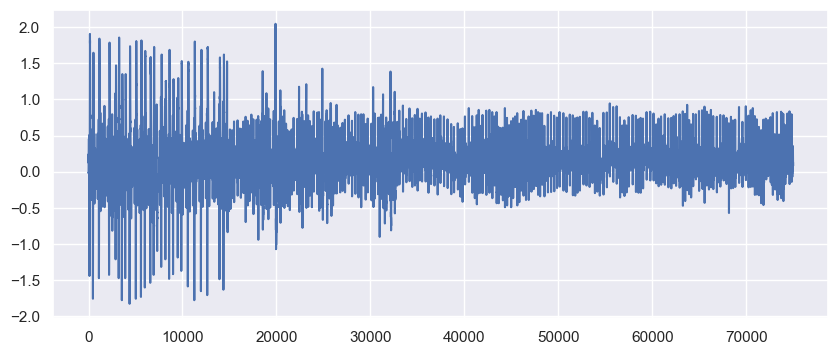

In [40]:
plt.figure(figsize=(10,4))
sns.lineplot(data=original_signals[-75000:, 0])

<AxesSubplot: >

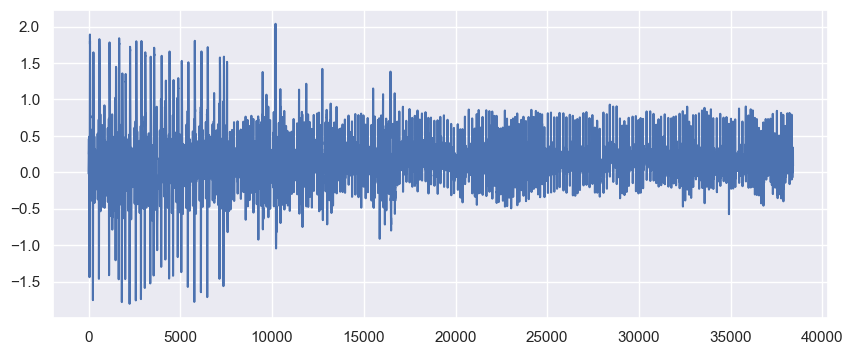

In [41]:
plt.figure(figsize=(10,4))
sns.lineplot(data=resampled_signals[-38400:, 0])